In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
lemma = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sawanta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

True

In [2]:
df = pd.read_excel("C:\\Users\\sawanta\\OneDrive - Dun and Bradstreet\\Desktop\\CustomerfeedbackJuly2022.xlsx", sheet_name = 'Main')
df.head(5)

,ID,Start time,Completion time,SBU/Dept,Are you satisfied the quality of D&B content / report?,Are you satisfied with the timeliness of the services provided by D&B?,Feedback,Sentiment Type,Keywords list /Name of Entity,Sentiment_Score
0,5,2022-04-04 13:05:19,2022-04-04 13:14:00,PAS,Yes,No,"D&B management level team is well organised, u...",Neutral,NaN,NaN
1,6,2022-04-04 13:53:59,2022-04-04 13:55:28,C-CAM,Yes,No,The report TAT must be brought down to minimum...,NaN,NaN,NaN
2,7,2022-04-04 16:03:16,2022-04-04 16:04:12,C-CAM,Yes,Yes,If Col E & Col F both Yes = positive,positive,NaN,NaN
3,8,2022-04-05 11:31:34,2022-04-05 11:40:01,C-CAM,Yes,No,"Report is excellent, but service levels are po...",Neutral,"excellent,poor,. need to improve",NaN
4,9,2022-04-05 11:48:30,2022-04-05 11:49:44,PAS,Yes,Yes,-,NaN,NaN,NaN


In [3]:
df.shape

(124, 10)

In [4]:
feedbacks =  df.dropna(subset = 'Feedback')
feedbacks.shape

(83, 10)

# NLTK

In [5]:
# Lower
feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: txt.lower())

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\2418888697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: txt.lower())


In [6]:
# Remove stopwords
stop_words=stopwords.words('english')
stop_words = ['!','.','=',',','/','1','2','...']
feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\2228764408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))


In [7]:
# Tokenization
feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: sent_tokenize(txt))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\791042743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: sent_tokenize(txt))


In [8]:
def words(data):
    words_ne=[]
    for word in data:
        if word not in stop_words:
            words_ne.append(word)
            
feedbacks['Words']= feedbacks['Feedback'].apply(lambda x: words(x))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\2489552281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Words']= feedbacks['Feedback'].apply(lambda x: words(x))


In [9]:
import seaborn as sns

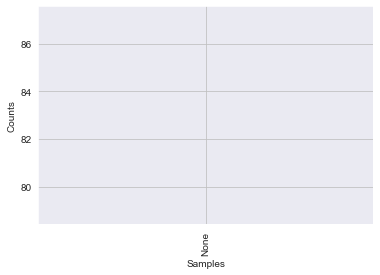

In [10]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(feedbacks['Words'])
nlp_words.plot(20);

In [11]:
# Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda x: stemming_on_text(x))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\3355330375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda x: stemming_on_text(x))


In [12]:
# Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda x: lemmatizer_on_text(x))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\2403874529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback']= feedbacks['Feedback'].apply(lambda x: lemmatizer_on_text(x))


In [13]:
#Joining tokenized text
feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: ' '.join(txt))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\1301444632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Feedback'] = feedbacks['Feedback'].apply(lambda txt: ' '.join(txt))


In [14]:
sid = SentimentIntensityAnalyzer()

In [15]:
# Getting polarity score
feedbacks['Score']= feedbacks['Feedback'].apply(lambda txt: sid.polarity_scores(txt))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\661513948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Score']= feedbacks['Feedback'].apply(lambda txt: sid.polarity_scores(txt))


In [16]:
# Getting compound score out of 3 polarity scores
feedbacks['Compound'] = feedbacks['Score'].apply(lambda txt: txt['compound'])

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\3218067287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Compound'] = feedbacks['Score'].apply(lambda txt: txt['compound'])


In [17]:
# Sentiment on the basis of polarity scores
def polarity_score(compound):
    if compound > 0:
        return "Positive"
    elif compound < 0:
        return "Negative"
    elif compound == 0:
        return "Neutral"

feedbacks['Sentiment'] = feedbacks['Compound'].apply(lambda val: polarity_score(val))

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\1411755688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedbacks['Sentiment'] = feedbacks['Compound'].apply(lambda val: polarity_score(val))


In [18]:
neg_feed = feedbacks[feedbacks['Sentiment']== 'Negative']

In [19]:
commonwords = pd.Series(' '.join(neg_feed['Feedback']).lower().split()).value_counts()[:100]
commonwords_df = commonwords.to_frame()
commonwords_df

,0
no,10
the,9
is,8
of,7
to,6
...,...
wrong,1
would,1
urgent,1
if,1


In [20]:
feedbacks.head(20)

,ID,Start time,Completion time,SBU/Dept,Are you satisfied the quality of D&B content / report?,Are you satisfied with the timeliness of the services provided by D&B?,Feedback,Sentiment Type,Keywords list /Name of Entity,Sentiment_Score,Words,Score,Compound,Sentiment
0,5,2022-04-04 13:05:19,2022-04-04 13:14:00,PAS,Yes,No,"d&b management level team is well organised, u...",Neutral,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.9198,Positive
1,6,2022-04-04 13:53:59,2022-04-04 13:55:28,C-CAM,Yes,No,the report tat must be brought down to minimum...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,7,2022-04-04 16:03:16,2022-04-04 16:04:12,C-CAM,Yes,Yes,if col e & col f both yes positive,positive,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",0.7430,Positive
3,8,2022-04-05 11:31:34,2022-04-05 11:40:01,C-CAM,Yes,No,"report is excellent, but service levels are po...",Neutral,"excellent,poor,. need to improve",NaN,None,"{'neg': 0.1, 'neu': 0.75, 'pos': 0.15, 'compou...",0.2617,Positive
4,9,2022-04-05 11:48:30,2022-04-05 11:49:44,PAS,Yes,Yes,-,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,12,2022-04-05 11:57:28,2022-04-05 11:59:00,DBC,Yes,No,"tough to contact and get the report ,online ac...",Negative,"Tough , not yet",NaN,None,"{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...",-0.1280,Negative
8,13,2022-04-05 12:14:59,2022-04-05 12:15:59,C-CAM,Yes,Yes,services are good,Positive,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive
11,16,2022-04-05 15:17:30,2022-04-05 15:18:50,DBC,Yes,Yes,tat time,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
13,18,2022-04-05 15:25:03,2022-04-05 15:27:14,DBC,Yes,Yes,in case any concern person is leaving the orga...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
14,19,2022-04-05 15:29:20,2022-04-05 15:31:19,DBC,Yes,Yes,would like d&b to be bit more detailed and giv...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.3612,Positive


In [2]:
def Named_entity(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

feedbacks['NER']= feedbacks['Feedback'].apply(lambda x: Named_entity(x))

NameError: name 'df' is not defined

In [22]:
feedbacks.head(20)

,ID,Start time,Completion time,SBU/Dept,Are you satisfied the quality of D&B content / report?,Are you satisfied with the timeliness of the services provided by D&B?,Feedback,Sentiment Type,Keywords list /Name of Entity,Sentiment_Score,Words,Score,Compound,Sentiment,NER
0,5,2022-04-04 13:05:19,2022-04-04 13:14:00,PAS,Yes,No,"d&b management level team is well organised, u...",Neutral,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.9198,Positive,"[(d, NN), (&, CC), (b, NN), (management, NN), ..."
1,6,2022-04-04 13:53:59,2022-04-04 13:55:28,C-CAM,Yes,No,the report tat must be brought down to minimum...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(the, DT), (report, NN), (tat, NN), (must, MD..."
2,7,2022-04-04 16:03:16,2022-04-04 16:04:12,C-CAM,Yes,Yes,if col e & col f both yes positive,positive,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",0.7430,Positive,"[(if, IN), (col, VBN), (e, NN), (&, CC), (col,..."
3,8,2022-04-05 11:31:34,2022-04-05 11:40:01,C-CAM,Yes,No,"report is excellent, but service levels are po...",Neutral,"excellent,poor,. need to improve",NaN,None,"{'neg': 0.1, 'neu': 0.75, 'pos': 0.15, 'compou...",0.2617,Positive,"[(report, NN), (is, VBZ), (excellent, JJ), (,,..."
4,9,2022-04-05 11:48:30,2022-04-05 11:49:44,PAS,Yes,Yes,-,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(-, :)]"
7,12,2022-04-05 11:57:28,2022-04-05 11:59:00,DBC,Yes,No,"tough to contact and get the report ,online ac...",Negative,"Tough , not yet",NaN,None,"{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...",-0.1280,Negative,"[(tough, JJ), (to, TO), (contact, VB), (and, C..."
8,13,2022-04-05 12:14:59,2022-04-05 12:15:59,C-CAM,Yes,Yes,services are good,Positive,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive,"[(services, NNS), (are, VBP), (good, JJ)]"
11,16,2022-04-05 15:17:30,2022-04-05 15:18:50,DBC,Yes,Yes,tat time,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(tat, NN), (time, NN)]"
13,18,2022-04-05 15:25:03,2022-04-05 15:27:14,DBC,Yes,Yes,in case any concern person is leaving the orga...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(in, IN), (case, NN), (any, DT), (concern, NN..."
14,19,2022-04-05 15:29:20,2022-04-05 15:31:19,DBC,Yes,Yes,would like d&b to be bit more detailed and giv...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.3612,Positive,"[(would, MD), (like, VB), (d, NN), (&, CC), (b..."


# NA Values

In [23]:
emp =df[df['Feedback'].isna()]

In [24]:
conditions = [
    (df['Are you satisfied the quality of D&B content / report?'] == 'Yes') & (df['Are you satisfied with the timeliness of the services provided by D&B?'] =='Yes'),
    (df['Are you satisfied the quality of D&B content / report?'] == 'No') & (df['Are you satisfied with the timeliness of the services provided by D&B?'] == 'No'),
    (df['Are you satisfied the quality of D&B content / report?'] == 'Yes') &(df['Are you satisfied with the timeliness of the services provided by D&B?'] == 'No'), 
    (df['Are you satisfied the quality of D&B content / report?'] == 'No') &(df['Are you satisfied with the timeliness of the services provided by D&B?'] == 'Yes')
]

# create a list of the values we want to assign for each condition
values = ['Positive', 'Negative', 'Timeliness(Neutral)', 'Quality(Neutral)']

# create a new column and use np.select to assign values to it using our lists as arguments
emp['Sentiment'] = pd.Series(np.select(conditions, values))

# display updated DataFrame
emp.head()

C:\Users\sawanta\AppData\Local\Temp\ipykernel_8964\129125266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['Sentiment'] = pd.Series(np.select(conditions, values))


,ID,Start time,Completion time,SBU/Dept,Are you satisfied the quality of D&B content / report?,Are you satisfied with the timeliness of the services provided by D&B?,Feedback,Sentiment Type,Keywords list /Name of Entity,Sentiment_Score,Sentiment
5,10,2022-04-05 11:51:59,2022-04-05 11:52:51,C-CAM,Yes,Yes,NaN,NaN,NaN,NaN,Positive
6,11,2022-04-05 11:53:04,2022-04-05 11:56:19,C-CAM,Yes,Yes,NaN,NaN,NaN,NaN,Positive
9,14,2022-04-05 12:43:58,2022-04-05 12:46:27,DBC,Yes,Yes,NaN,NaN,NaN,NaN,Positive
10,15,2022-04-05 13:50:04,2022-04-05 13:50:57,DBC,Yes,Yes,NaN,NaN,NaN,NaN,Positive
12,17,2022-04-05 15:22:28,2022-04-05 15:23:03,C-CAM,Yes,Yes,NaN,NaN,NaN,NaN,Positive


## Final Dataset

In [25]:
df_fin = pd.concat([feedbacks, emp])

In [26]:
df_fin = df_fin.sort_values(by='ID')
df_fin

,ID,Start time,Completion time,SBU/Dept,Are you satisfied the quality of D&B content / report?,Are you satisfied with the timeliness of the services provided by D&B?,Feedback,Sentiment Type,Keywords list /Name of Entity,Sentiment_Score,Words,Score,Compound,Sentiment,NER
0,5,2022-04-04 13:05:19,2022-04-04 13:14:00,PAS,Yes,No,"d&b management level team is well organised, u...",Neutral,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.9198,Positive,"[(d, NN), (&, CC), (b, NN), (management, NN), ..."
1,6,2022-04-04 13:53:59,2022-04-04 13:55:28,C-CAM,Yes,No,the report tat must be brought down to minimum...,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(the, DT), (report, NN), (tat, NN), (must, MD..."
2,7,2022-04-04 16:03:16,2022-04-04 16:04:12,C-CAM,Yes,Yes,if col e & col f both yes positive,positive,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",0.7430,Positive,"[(if, IN), (col, VBN), (e, NN), (&, CC), (col,..."
3,8,2022-04-05 11:31:34,2022-04-05 11:40:01,C-CAM,Yes,No,"report is excellent, but service levels are po...",Neutral,"excellent,poor,. need to improve",NaN,None,"{'neg': 0.1, 'neu': 0.75, 'pos': 0.15, 'compou...",0.2617,Positive,"[(report, NN), (is, VBZ), (excellent, JJ), (,,..."
4,9,2022-04-05 11:48:30,2022-04-05 11:49:44,PAS,Yes,Yes,-,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[(-, :)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,125,2022-04-29 00:24:45,2022-04-29 00:41:37,C-CAM,Yes,No,"total timeline need to be improved a bit, mark...",NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.7425,Positive,"[(total, JJ), (timeline, NN), (need, NN), (to,..."
120,126,2022-04-29 09:44:03,2022-04-29 09:47:05,CBIG,Yes,Yes,"none. thanks to d&b team for their excellent, ...",NaN,NaN,NaN,None,"{'neg': 0.146, 'neu': 0.577, 'pos': 0.276, 'co...",0.6472,Positive,"[(none, NN), (., .), (thanks, NNS), (to, TO), ..."
121,127,2022-04-29 09:44:03,2022-04-29 09:47:05,CBIG,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,NaN
122,128,2022-04-29 09:44:03,2022-04-29 09:47:05,CBIG,Yes,Yes,good service,NaN,NaN,NaN,None,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive,"[(good, JJ), (service, NN)]"


In [27]:
positive_count = df_fin['Sentiment'].value_counts()['Positive']
negative_count = df_fin['Sentiment'].value_counts()['Negative']
neutral_count = df_fin['Sentiment'].value_counts()['Neutral']
print ('Positive Feedbacks: ', positive_count)
print ('Negative Feedbacks: ', negative_count)
print ('Neutral Feedbacks: ',neutral_count)

Positive Feedbacks:  84
Negative Feedbacks:  16
Neutral Feedbacks:  22


In [28]:
df_fin.to_excel('Feedbacks_output.xlsx')